### קבצי ה csv מתארים נתוני מכירות מוצרים דיגטליים לפי חודש, בשנת 2019 

# Sales Analysis
## תרגיל סיכום 

### בצעי את ההוראות שלפניך על מנת לנקות, לנתח ולהציג ויזואלית את הנתונים
### בהצלחה!

#### 1. יביאי את הספריות הדרושות

In [1]:
import re
import os

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



#### 2. אחד csv אחדי את כל חודשי המכירות לקובץ
#### שמרי אותו בתיקיה שלך

In [2]:


folder_path = os.path.expanduser("C:\\Users\\LENOVO\\Desktop\\sales-analysis-digital-products-2019\\Sales_Data")
output_file= os.path.expanduser("C:\\Users\\LENOVO\\Desktop\\sales-analysis-digital-products-2019\\combined.csv")

csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

dfs = []

for file in csv_files:
    path=os.path.join(folder_path , file)
    df = pd.read_csv(path)
    dfs.append(df)

combined_df = pd.concat(dfs , ignore_index=True)

#save the combine file

combined_df.to_csv(output_file , index = False )

print(" The file create successfully" , output_file)

 The file create successfully C:\Users\LENOVO\Desktop\sales-analysis-digital-products-2019\combined.csv


In [3]:
# יתכן שבשיטה בה איחדת את הקבצים, נוספו לך גם שמות העמודות שוב ושוב כחלק מנתוני הטבלה
# כדי לטפל בזה פשוט הוסיפי את שורת הקוד הבאה
combined_df = combined_df[ combined_df['Order Date']!='Order Date']




#### 3. הציגי מספר שורות מהטבלה שהתקבלה

combined_df.heed()


In [4]:
combined_df.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## ננקה את המידע!

##### 4....הפעילי שיקול דעת , nan- טפלי בערכי ה

In [5]:
combined_df.isnull().sum()
count_all_line_empty = combined_df.isnull().all(axis=1).sum()
count_all_line_empty
# הגעתי למסכנה שכל מה שיש בו ריק אז כל השורה שלו ריקה ולכן אמחוק שורות שלמות#
combined_df = combined_df[~combined_df.isnull().all(axis=1)]
count_all_line_empty = combined_df.isnull().all(axis=1).sum()
count_all_line_empty


np.int64(0)

##### 5. הציגי מידע על עמודות הטבלה

In [6]:



combined_df.columns

combined_df["Price Each"]

combined_df.dtypes

combined_df.nunique()
combined_df["Price Each"].unique()

combined_df["Price Each"].value_counts()



Price Each
11.95     21903
14.95     21658
2.99      20641
3.84      20577
11.99     18882
150       15450
99.99     13325
149.99     7507
700        6804
389.99     6230
379.99     6181
600        5490
300        4780
1700       4702
999.99     4128
109.99     4101
400        2056
600.0      1347
150.0        99
700.0        38
1700.0       22
300.0        20
400.0         9
Name: count, dtype: int64

#### 6.הציגי מידע על  מדדי מרכז בעמודת המחיר
##### מהי הבעיה?

In [7]:

#mean_in_Price_Each = df["Price Each"].mean() טעות
# מכילה גם ערכים מסוג טקסטולכן א"א לחשב גם על טקסט וגע על מיספרים ממוצעPrice Each הבעיה היא שעמודה 
#  Price Each לכן נהמיר את 




#### 7. טפלי בבעיה שזיהית בעמודה זו, ואם צריך גם בעמודות נוספות

In [8]:
combined_df["Price Each"] = pd.to_numeric(combined_df["Price Each"] ,errors='coerce')
combined_df["Price Each"].mean()#ממוצע
combined_df["Price Each"].median()#חציון
combined_df["Price Each"].mode()#שכיח

0    11.95
Name: Price Each, dtype: float64

#### 8. החליפי את שמות כל העמודות לאותיות קטנות

In [9]:
combined_df.columns

combined_df.columns = [c.lower() for c in combined_df.columns]
combined_df.columns


Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address'],
      dtype='object')

#### 9. ?האם אפשר להפוך עמודת קוד המוצר לאינדקס הטבלה

In [10]:
#היות שלא כל הערכים בעמודה זו יחודיים לכן לא ניתן להפוך את העמודה לאינדקס
combined_df["order id"].nunique() == len(combined_df["order id"]) 



False

### מרחיבים את הטבלה עם עמודות נוספות...

In [11]:
#  datetime ל  order date    שלב ראשון המרת העמודה  
combined_df["order date"] = pd.to_datetime(combined_df["order date"], errors='coerce')



C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6936\3532130841.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  combined_df["order date"] = pd.to_datetime(combined_df["order date"], errors='coerce')


#### 10. הוסיפי עמודת חודש והכניסי את הערך המתאים מעמודת תאריך

In [12]:
# שלב שני ניצור עמודה חדשה ונשים בה את החודש
combined_df["month"] = combined_df["order date"].dt.month
combined_df.columns

Index(['order id', 'product', 'quantity ordered', 'price each', 'order date',
       'purchase address', 'month'],
      dtype='object')

#### 11. הוסיפי עמודת עיר והכניסי את הערכים המתאימים מעמודת הכתובת

In [13]:

combined_df["city"] = combined_df["purchase address"].str.split(",").str[1].str.strip()
combined_df["city"]


0                Dallas
2                Boston
3           Los Angeles
4           Los Angeles
5           Los Angeles
              ...      
186845      Los Angeles
186846    San Francisco
186847    San Francisco
186848    San Francisco
186849    San Francisco
Name: city, Length: 185950, dtype: object

## נחקור ונציג את המידע!

#### ?שאלה 1: מהו חודש המכירות הטוב ביותר? כמה הרוויחו באותו חודש
##### הציגי את תשובתך, באמצעות דיאגרמת מקלות

In [14]:
month_worth = combined_df.groupby("month")["price each"].sum().idxmax()# month with the highest sales
total_sales_per_month = combined_df.groupby("month")["price each"].sum().max() #maximum sales in that month
print(f"The total sales in month {month_worth} is: {total_sales_per_month}")

The total sales in month 12 is: 4588415.41


#### ?שאלה 2: באיזו עיר סכום המכירות הגדול ביותר
##### הציגי את תשובתך, באמצעות דיאגרמת מקלות

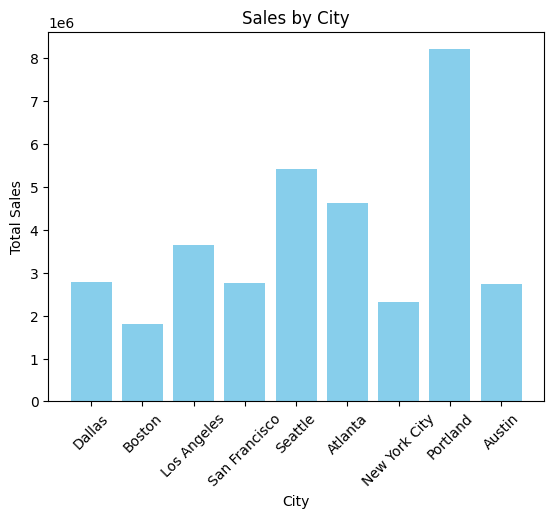

In [15]:
cities = combined_df["city"].unique()
prices = combined_df.groupby("city")["price each"].sum().values
import numpy as np
 
xpos = np.arange(len(cities))


plt.title("Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.bar(xpos, prices, color='skyblue')

plt.xticks(xpos, cities, rotation=45)

plt.show()



#### ?שאלה 3: אלו מוצרים בדרך כלל נקנים ביחד  

In [16]:
#אובייקט המכיל את המוצרים שנרכשו בה
obj={
    "order_id": combined_df["order id"].unique(),
    "products": combined_df.groupby("order id")["product"].apply(list)
}

    

####   ?שאלה 4: מהו המוצר הנמכר ביותר 

In [17]:
arr_most_sold_products = combined_df.groupby("product")["quantity ordered"].sum().sort_values(ascending=False)
arr_most_sold_products.index[0]

'USB-C Charging Cable'

In [18]:
####   ?שאלה 5: האם יש קשר בין החודש להיקף המכירות
##### השתמשי בדיאגרמת פיזור 



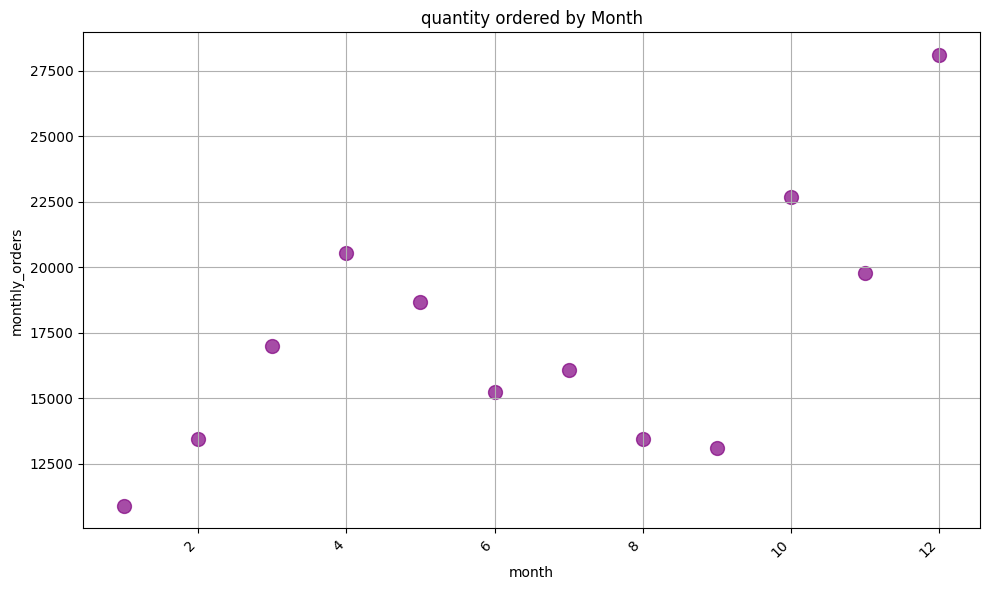

In [19]:

combined_df["quantity ordered"] = pd.to_numeric(combined_df["quantity ordered"], errors='coerce').fillna(0).astype(int)

monthly_orders = combined_df.groupby("month")["quantity ordered"].sum().sort_values(ascending=False)

monthly_orders

plt.figure(figsize=(10, 6))
plt.scatter(monthly_orders.index, monthly_orders.values, alpha=0.7, color='purple', s=100) # s for marker size

plt.title("quantity ordered by Month")
plt.xlabel("month")
plt.ylabel("monthly_orders")
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()




In [20]:
monthly_orders

month
12    28114
10    22703
4     20558
11    19798
5     18667
3     17005
7     16072
6     15253
2     13449
8     13448
9     13109
1     10903
Name: quantity ordered, dtype: int64

#### שאלה 6: הציגי דיאגרמת מדדי מרכז למחירי המוצרים השונים

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6936\3951982633.py:14: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(plot_data, labels=product_prices_sorted['product'], patch_artist=True)


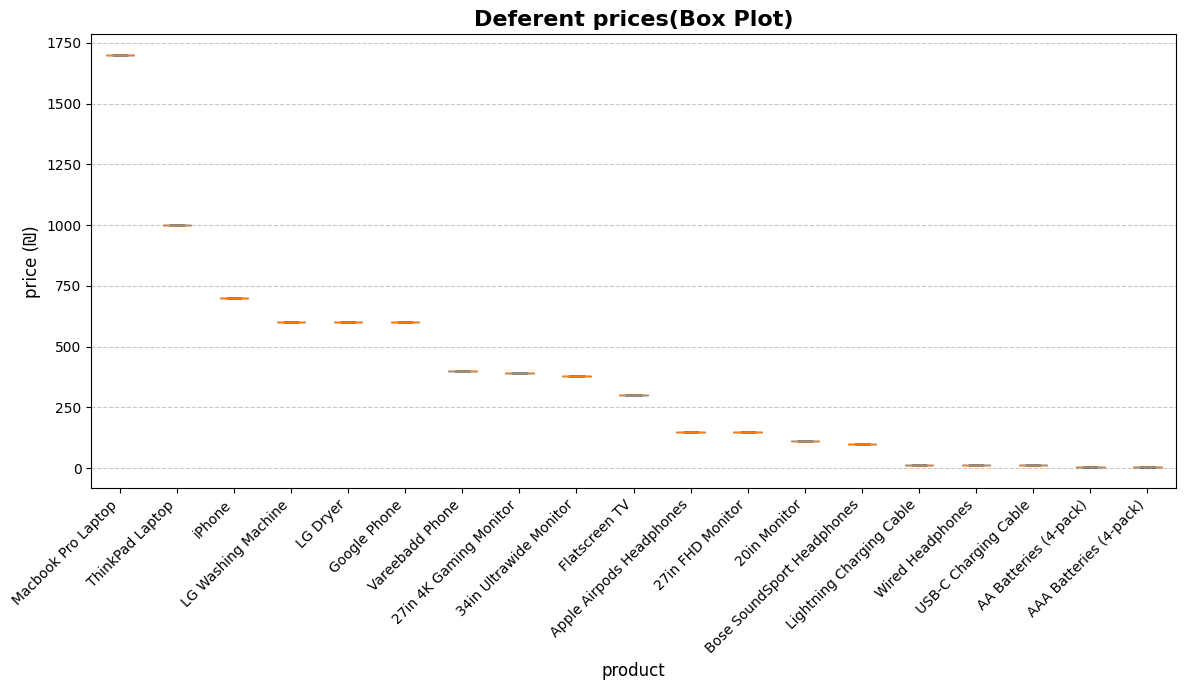

In [21]:
product_prices = combined_df[['product', 'price each']].drop_duplicates()

# נמיין את המוצרים לפי מחירם, מהיקר לזול, לשיפור קריאות התרשים
product_prices_sorted = product_prices.sort_values(by='price each', ascending=False)


plt.figure(figsize=(12, 7))

# כדי ש-plt.boxplot ידע לצייר קופסאות נפרדות, צריך רשימה של מערכים,
# כאשר כל מערך הוא הנתונים עבור קופסה אחת.
# כאן, כל מערך יכיל רק מחיר אחד, ולכן הקופסה תיראה כקו.
plot_data = [product_prices_sorted['price each'].loc[product_prices_sorted['product'] == p].values for p in product_prices_sorted['product']]

plt.boxplot(plot_data, labels=product_prices_sorted['product'], patch_artist=True)

# הוספת כותרות ותוויות
plt.title("Deferent prices(Box Plot)", fontsize=16, fontweight='bold')
plt.xlabel("product", fontsize=12)
plt.ylabel("price (₪)", fontsize=12)

# שיפור קריאות התוויות בציר X (אם שמות המוצרים ארוכים)
plt.xticks(rotation=45, ha='right', fontsize=10)

# הוספת קווי רשת לציר ה-Y
plt.grid(axis='y', linestyle='--', alpha=0.7)

# התאמת הפריסה
plt.tight_layout()
plt.show()

#### ?שאלה 7: מהן 4 הערים שבהם היקף המכירות הגדול ביותר
##### הציגי תרשים עוגה לתיאור הנתונים

([<matplotlib.patches.Wedge at 0x1e9ceb58ce0>,
 [Text(-0.975789291359748, -0.5077748111787752, 'San Francisco'),
  Text(0.8389736062841383, -0.7114234238191682, 'Los Angeles'),
  Text(0.81813190099247, 0.7352959897744904, 'New York City'),
  Text(-0.37145123433062904, 1.0353859089799573, 'Boston')],
 [Text(-0.5322487043780443, -0.27696807882478647, '37.5%'),
  Text(0.4576219670640754, -0.3880491402650008, '24.8%'),
  Text(0.44625376417771084, 0.4010705398769947, '20.8%'),
  Text(-0.2026097641803431, 0.5647559503527039, '16.8%')])

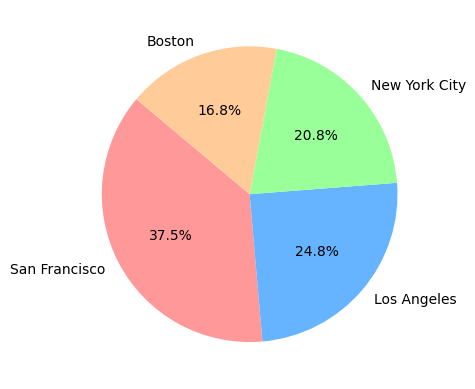

In [22]:

combined_df["quantity ordered"] = pd.to_numeric(combined_df["quantity ordered"], errors='coerce').fillna(0).astype(int)

city_orders = combined_df.groupby("city")["quantity ordered"].sum().sort_values(ascending=False)
city_orders.head(4)# to know the top 4 cities by quantity ordered
top_4_city_price = city_orders.head(4).values



labels = ["San Francisco" ,"Los Angeles","New York City","Boston"]
plt.pie(top_4_city_price, labels=labels, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])



#### ....אתגר: צרי שאלת מחקר משלך ועני עליה

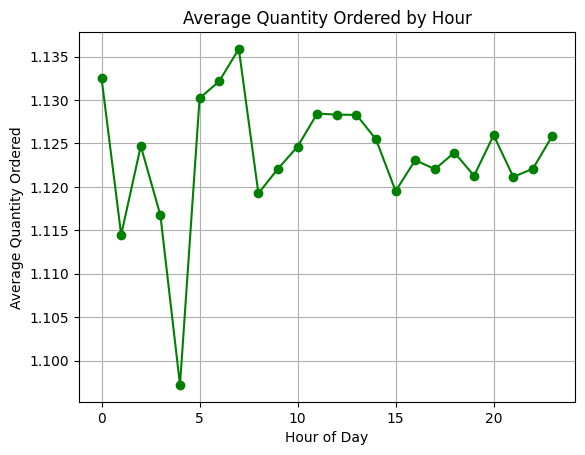

In [23]:
####  שאלה האם יש קשר בין כמות המוצרים שנלקחו בהזמנה לשעה



####פיתרון הוא לעשות ממוצע מהכמות מוצר לאותה שעה
combined_df["hour"] = combined_df["order date"].dt.hour


grouped = combined_df.groupby("hour")["quantity ordered"].mean()

plt.plot(grouped.index, grouped.values, marker='o', color='green')
plt.xlabel("Hour of Day")
plt.ylabel("Average Quantity Ordered")
plt.title("Average Quantity Ordered by Hour")
plt.grid(True)
plt.show()

